In [31]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import tree

# S&P 500 Constituents Financial Data
- https://datahub.io/core/s-and-p-500-companies-financials#resource-constituents-financials

In [32]:
# Load S%P 500 constituent data

#spdata = pd.read_csv('C:/Users/Erik/Desktop/Workspace/final_project/Resources/constituents-financials_csv.csv')
spdata = pd.read_csv('C:/Users/Erik/Desktop/Stock-Data-Clustering-for-Investment-Decisions/constituents-financials_csv.csv')
spdata.head()


,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.33,7.92,259.77,175.49,1.387211e+11,9.048000e+09,4.39,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.15,1.70,68.39,48.93,1.078342e+10,6.010000e+08,3.58,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.91,0.26,64.60,42.28,1.021210e+11,5.744000e+09,3.74,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.50,3.29,125.86,60.05,1.813863e+11,1.031000e+10,6.29,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.71,5.44,162.60,114.82,9.876586e+10,5.643228e+09,2.60,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [33]:
# Data Cleaning
spdata.columns = ['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend_Yield', 'Earnings/Share', 
                  '52_Week_High', '52_Week_Low', 'Market_Cap', 'EBITDA', 'Price/Sales', 'Price/Book', 'SEC_Filings']
spdata = spdata.drop(columns=['SEC_Filings'])

#Additional work can be done here to replace values in Lieu of dropping rows with missing data
#This requires additional stock metrics such as "Market Value per Share

#spdata.count()
spdata.dropna(inplace=True)

spdata['Dividend_Yield'] = spdata['Dividend_Yield'].replace({' $-   ': '0'})
spdata['Earnings/Share'] = spdata['Earnings/Share'].replace({' $-   ': '0'})

#Check Dataframe Data Types
#spdata.dtypes

#Change dtypes for columns where replace functions were use
spdata[["Dividend_Yield", "Earnings/Share"]] = spdata[["Dividend_Yield", "Earnings/Share"]].apply(pd.to_numeric)

#spdata.dtypes
#spdata.count()
spdata.head()


,Symbol,Name,Sector,Price,Price/Earnings,Dividend_Yield,Earnings/Share,52_Week_High,52_Week_Low,Market_Cap,EBITDA,Price/Sales,Price/Book
0,MMM,3M Company,Industrials,222.89,24.31,2.33,7.92,259.77,175.49,1.387211e+11,9.048000e+09,4.39,11.34
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.15,1.70,68.39,48.93,1.078342e+10,6.010000e+08,3.58,6.35
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.91,0.26,64.60,42.28,1.021210e+11,5.744000e+09,3.74,3.19
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.50,3.29,125.86,60.05,1.813863e+11,1.031000e+10,6.29,26.14
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.71,5.44,162.60,114.82,9.876586e+10,5.643228e+09,2.60,10.62


# Analysis 1: EBITDA vs. Market Capitalization

### EBITDA
- Earnings Before Interest, Taxes, Depreciation and Amortization
- https://www.investopedia.com/terms/e/ebitda.asp

### Market Capitalization
- Total dollar market value of a company's outstanding shares
- https://www.investopedia.com/terms/m/marketcapitalization.asp

In [34]:
# Create Array of Samples "X1" for EBITDA vs. Market_Cap
X1_df = spdata.loc[:, spdata.columns.intersection(['Market_Cap', 'EBITDA'])]
X1_df.head()
X1 = X1_df.values

In [35]:
# Use n_clusters=4 as the k value
kmeans = KMeans(n_clusters=4)

# Fit the model to the data
kmeans.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
# Predict the clusters
predicted_clusters = kmeans.predict(X1)

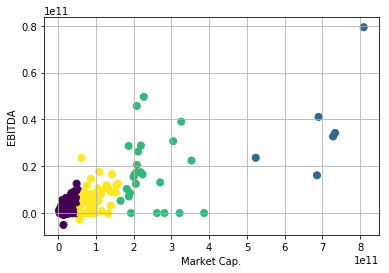

In [37]:
plt.scatter(X1[:, 0], X1[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.xlabel('Market Cap.')
plt.ylabel('EBITDA')
plt.grid(True)
plt.show()

# Analysis 2: Price/Earnings vs. Price/Book

### Price/Earnings (P/E)
- Higher values typically indicate that investors expect future growth.
- Better when used to compare stocks within the same industry.
- https://www.investopedia.com/terms/p/price-earningsratio.asp

### Price/Book (P/B)
- ratio of market value of a stock to its bookvalue
- P/B < 1.0 is typically considered a good investment
- P/B < 3.0 is typically used as a benchmark
- https://www.investopedia.com/terms/p/price-to-bookratio.asp

### The Cluster
- Clusters with Low P/B and High P/E are considered good investments



In [38]:
# Create Array of Samples "X2" for Price/Earnings vs. Price/Book
X2_df = spdata.loc[:, spdata.columns.intersection(['Price/Book', 'Price/Earnings'])]
X2 = X2_df.values

In [39]:
# Use n_clusters=4 as the k value
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
# Predict the clusters
predicted_clusters = kmeans.predict(X2)

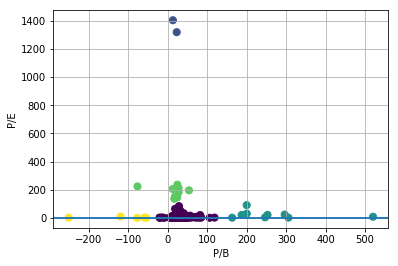

In [41]:
plt.scatter(X2[:, 0], X2[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.xlabel('P/B')
plt.ylabel('P/E')
plt.grid(True)
plt.axhline(y=3)
plt.axhline(y=1)
#plt.ylim(0, 5)

plt.show()

# Analysis 3: Price/Earnings vs. Price/Sales

### Price/Earnings (P/E) 
- Higher values typically indicate that investors expect future growth
- Better when used to compare stocks within the same industry
- https://www.investopedia.com/terms/p/price-earningsratio.asp

### Price/Share (P/S)
- Indicates the market valuation of each dollar of a company's sales
- The lower the P/S ratio, the more attractive the investment
- https://www.investopedia.com/articles/fundamental/03/032603.asp

### The Cluster
- P/E will be plotted against P/S
- The samples will be clustered to determine which stocks are viable investments based on this metric
- The successful clustering will have a higher P/E indicating growth potential, and a low P/S ratio


In [42]:
# Create Array of Samples "X3" for Price/Sales vs. Price/Earnings
X3_df = spdata.loc[:, spdata.columns.intersection(['Price/Sales', 'Price/Earnings'])]
X3_df.head()
X3 = X3_df.values

In [43]:
# Use n_clusters=4 as the k value
kmeans = KMeans(n_clusters=8)

# Fit the model to the data
kmeans.fit(X3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
# Predict the clusters
predicted_clusters = kmeans.predict(X3)

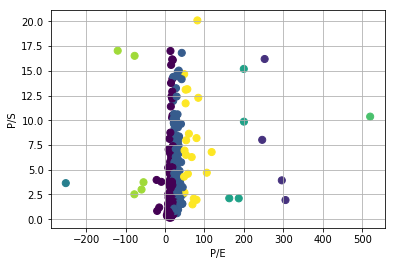

In [45]:
plt.scatter(X3[:, 0], X3[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.xlabel('P/E')
plt.ylabel('P/S')
plt.grid(True)
plt.show()

# Analysis 4: Earnings/Share vs. Price/Book  

### Earnings/Share (EPS)
- Indicator of a company's profitability
- Metric used to describe how the market values each dollar of profit for a particular stock
- https://www.investopedia.com/terms/e/eps.asp

### Price/Book (P/B)
- ratio of market value of a stock to its bookvalue
- P/B < 1.0 is typically considered a good investment
- P/B < 3.0 is typically used as a benchmark
- https://www.investopedia.com/terms/p/price-to-bookratio.asp

### The Cluster
- EPS vs. P/B
- Desired cluster: High EPS, P/B < 3.0



In [46]:
# Create Array of Samples "X4" for Price/Book vs. Earnings/Share
X4_df = spdata.loc[:, spdata.columns.intersection(['Price/Book', 'Earnings/Share'])]
X4_df.head()
X4 = X4_df.values

In [47]:
# Use n_clusters=4 as the k value
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X4)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
# Predict the clusters
predicted_clusters = kmeans.predict(X4)

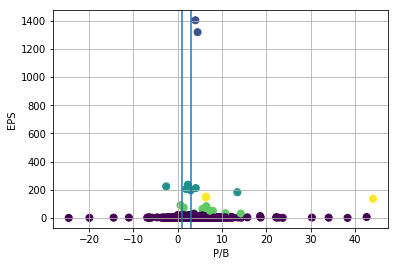

In [49]:
plt.scatter(X4[:, 0], X4[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.xlabel('P/B')
plt.ylabel('EPS')
plt.axvline(x=1)
plt.axvline(x=3)
plt.grid(True)
plt.show()

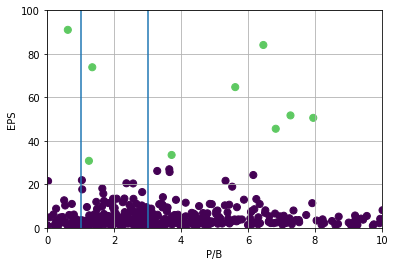

In [50]:
plt.scatter(X4[:, 0], X4[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.xlabel('P/B')
plt.ylabel('EPS')
plt.xlim(0,10)
plt.ylim(0,100)
plt.axvline(x=1)
plt.axvline(x=3)
plt.grid(True)
plt.show()

# Analysis 5: Price/Earnings vs. Earnings/Share  

### Price/Earnings (P/E) 
- Higher values typically indicate that investors expect future growth
- Better when used to compare stocks within the same industry
- https://www.investopedia.com/terms/p/price-earningsratio.asp

### Earnings/Share (EPS)
- Indicator of a company's profitability
- Metric used to describe how the market values each dollar of profit for a particular stock
- https://www.investopedia.com/terms/e/eps.asp


### The Cluster
- Desired cluster: High P/E, High EPS

In [59]:
# Create Array of Samples "X5" for Price/Earnings vs. Earnings/Share
X5_df = spdata.loc[:, spdata.columns.intersection(['Earnings/Share', 'Price/Earnings'])]
X5_df.head()
X5 = X5_df.values

# Use n_clusters=4 as the k value
kmeans = KMeans(n_clusters=10, n_init=50, max_iter=100000)

# Fit the model to the data
kmeans.fit(X5)

# Predict the clusters
predicted_clusters = kmeans.predict(X5)

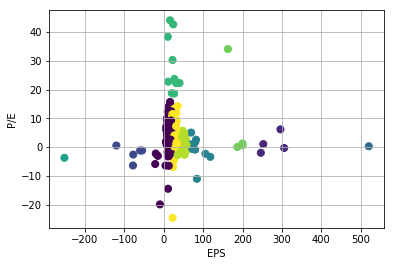

In [60]:
plt.scatter(X5[:, 0], X5[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.xlabel('EPS')
plt.ylabel('P/E')
plt.grid(True)
plt.show()

# Random Forest Classifier

- A random forest decision tree is implemented to build a model for classification of stock buying decisions
- P/B, P/E, EPS, P/S are used as inputs
- The Buying Decision Determined from Kmeans clustering ( 1, Buy or 0, Don't Buy ) is used as the output for the supervised machine learning algorithm
- A value of 1 or 0 is assigned based on an EPS < 3.0

In [61]:
decisions = [0, 1, 1, 0, 0, 1, 0, 0, 0, 1]

spdata_decisions = spdata.head(10)
spdata_decisions = spdata_decisions.assign(Decision = decisions)
spdata_decisions

,Symbol,Name,Sector,Price,Price/Earnings,Dividend_Yield,Earnings/Share,52_Week_High,52_Week_Low,Market_Cap,EBITDA,Price/Sales,Price/Book,Decision
0,MMM,3M Company,Industrials,222.89,24.31,2.33,7.92,259.77,175.49,1.387211e+11,9.048000e+09,4.39,11.34,0
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.15,1.70,68.39,48.93,1.078342e+10,6.010000e+08,3.58,6.35,1
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.91,0.26,64.60,42.28,1.021210e+11,5.744000e+09,3.74,3.19,1
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.50,3.29,125.86,60.05,1.813863e+11,1.031000e+10,6.29,26.14,0
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.71,5.44,162.60,114.82,9.876586e+10,5.643228e+09,2.60,10.62,0
5,ATVI,Activision Blizzard,Information Technology,65.83,31.80,0.43,1.28,74.95,38.93,5.251867e+10,2.704000e+09,10.60,5.16,1
6,AYI,Acuity Brands Inc,Industrials,145.41,18.22,0.35,7.43,225.36,142.00,6.242378e+09,5.878000e+08,1.80,3.55,0
7,ADBE,Adobe Systems Inc,Information Technology,185.16,52.31,0.00,3.39,204.45,114.45,9.455021e+10,2.538040e+09,13.09,11.06,0
8,AAP,Advance Auto Parts,Consumer Discretionary,109.63,19.54,0.22,6.19,169.55,78.81,8.123612e+09,8.539410e+08,1.13,2.51,0
9,AMD,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.00,0.03,15.65,9.70,1.119166e+10,3.390000e+08,2.11,21.47,1


In [62]:
spdata_test = spdata.head(10)
spdata_test = spdata_test.drop(["Symbol", "Name", "Sector"], axis=1)

feature_names = spdata_test.columns

spdata_test

,Price,Price/Earnings,Dividend_Yield,Earnings/Share,52_Week_High,52_Week_Low,Market_Cap,EBITDA,Price/Sales,Price/Book
0,222.89,24.31,2.33,7.92,259.77,175.49,1.387211e+11,9.048000e+09,4.39,11.34
1,60.24,27.76,1.15,1.70,68.39,48.93,1.078342e+10,6.010000e+08,3.58,6.35
2,56.27,22.51,1.91,0.26,64.60,42.28,1.021210e+11,5.744000e+09,3.74,3.19
3,108.48,19.41,2.50,3.29,125.86,60.05,1.813863e+11,1.031000e+10,6.29,26.14
4,150.51,25.47,1.71,5.44,162.60,114.82,9.876586e+10,5.643228e+09,2.60,10.62
5,65.83,31.80,0.43,1.28,74.95,38.93,5.251867e+10,2.704000e+09,10.60,5.16
6,145.41,18.22,0.35,7.43,225.36,142.00,6.242378e+09,5.878000e+08,1.80,3.55
7,185.16,52.31,0.00,3.39,204.45,114.45,9.455021e+10,2.538040e+09,13.09,11.06
8,109.63,19.54,0.22,6.19,169.55,78.81,8.123612e+09,8.539410e+08,1.13,2.51
9,11.22,187.00,0.00,0.03,15.65,9.70,1.119166e+10,3.390000e+08,2.11,21.47


In [63]:
target = spdata_decisions["Decision"]
target_names = [1, 0]

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(spdata_test, target, random_state=42)

In [65]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [29]:
metric_weights = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
metric_weights_df = pd.DataFrame(metric_weights, columns=["Weight", "Stock Metric"])
metric_weights_df

,Weight,Stock Metric
0,0.176417,Earnings/Share
1,0.162917,52_Week_High
2,0.162188,Price
3,0.157188,52_Week_Low
4,0.062083,EBITDA
5,0.044417,Price/Book
6,0.041208,Price/Earnings
7,0.031944,Price/Sales
8,0.018444,Market_Cap
9,0.008194,Dividend_Yield
